/tmp/ipykernel_1799383/4266196291.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axes[0].plot(fe_percentage, overpotential_after, 'r.', markersize=10, color='black', label='after stability test')
/tmp/ipykernel_1799383/4266196291.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  axes[0].plot(fe_percentage_pred, overpotential_after_pred, 'b-', color='green')
/tmp/ipykernel_1799383/4266196291.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  axes[1].plot(fe_percentage, tafel_after, 'r.', markersize=10, color='black', label='after stability test')
/tmp/ipykernel_1799383/4266196291.py:50: UserWarning: color is redundantly defined by the 'color' 

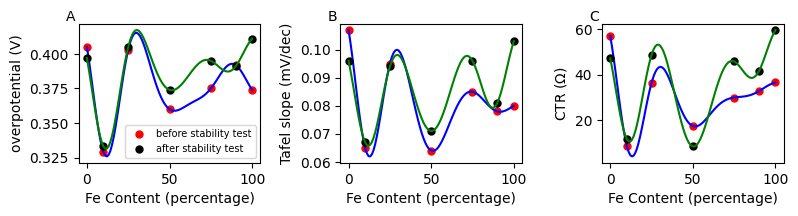

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from skopt import Optimizer
from skopt.acquisition import gaussian_ei

# Load the data
data = np.loadtxt('fe_percentage_overpotential_tafel_ctr.txt')
fe_percentage = data[:, 0].reshape(-1, 1)  # Fe content
overpotential_before = data[:, 1]  # Overpotential
overpotential_after = data[:, 2]
tafel_before = data[:, 3]
tafel_after = data[:, 4]
ctr_before = data[:, 5]
ctr_after = data[:, 6]


kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel, optimizer=None, normalize_y=True)

gp.fit(fe_percentage, overpotential_before)

fe_percentage_pred = np.linspace(fe_percentage.min(), fe_percentage.max(), 100).reshape(-1, 1)

fig, axes = plt.subplots(1, 3, figsize=(8, 2.3))

gp.fit(fe_percentage, overpotential_before)
overpotential_before_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[0].plot(fe_percentage, overpotential_before, 'r.', markersize=10, label='before stability test')
axes[0].plot(fe_percentage_pred, overpotential_before_pred, 'b-')

gp.fit(fe_percentage, overpotential_after)  # Fit to 'after stability test' data
overpotential_after_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[0].plot(fe_percentage, overpotential_after, 'r.', markersize=10, color='black', label='after stability test')
axes[0].plot(fe_percentage_pred, overpotential_after_pred, 'b-', color='green')
axes[0].set_xlabel('Fe Content (percentage)')
axes[0].set_ylabel('overpotential (V)')
axes[0].legend(fontsize = 7)

gp.fit(fe_percentage, tafel_before)
tafel_before_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[1].plot(fe_percentage, tafel_before, 'r.', markersize=10, label='before stability test')
axes[1].plot(fe_percentage_pred, tafel_before_pred, 'b-')

gp.fit(fe_percentage, tafel_after)  # Fit to 'after stability test' data
tafel_after_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[1].plot(fe_percentage, tafel_after, 'r.', markersize=10, color='black', label='after stability test')
axes[1].plot(fe_percentage_pred, tafel_after_pred, 'b-', color='green')
axes[1].set_xlabel('Fe Content (percentage)')
axes[1].set_ylabel('Tafel slope (mV/dec)')

gp.fit(fe_percentage, ctr_before)
ctr_before_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[2].plot(fe_percentage, ctr_before, 'r.', markersize=10, label='before stability test')
axes[2].plot(fe_percentage_pred, ctr_before_pred, 'b-')

gp.fit(fe_percentage, ctr_after)  # Fit to 'after stability test' data
ctr_after_pred, sigma = gp.predict(fe_percentage_pred, return_std=True)
axes[2].plot(fe_percentage, ctr_after, 'r.', markersize=10, color='black', label='after stability test')
axes[2].plot(fe_percentage_pred, ctr_after_pred, 'b-', color='green')
axes[2].set_xlabel('Fe Content (percentage)')
axes[2].set_ylabel(r'CTR ($\Omega$)')

axes[0].text(-0.07, 1.1, 'A', ha='left', va='top', transform=axes[0].transAxes)
axes[1].text(-0.07, 1.1, 'B', ha='left', va='top', transform=axes[1].transAxes)
axes[2].text(-0.07, 1.1, 'C', ha='left', va='top', transform=axes[2].transAxes)

plt.tight_layout()
plt.show()

fig.savefig('fig_eta_tafel_ctr_fit.pdf', dpi = 300, bbox_inches = 'tight')